# Practice Skills

- Creative feature engineering 
- Advanced regression techniques like random forest and gradient boosting
- Learn how to predict prices and key features

## First Step: Define the Business Case

We have **79 explanatory variables** describing (almost) every aspect of residential homes in Ames, Iowa. 

The goal is to **predict the final price** of each home, and understand what are the **key variables** that affect it.

This can help: 
- Real State agencies/apps, to set the prices of the homes, by focusing on the variables that really matter. 
- Individuals that want to sell their houses, and have to decide upon a price. 
- Individuals that want to rebuild their houses to increase their value, in a way that they can use their limited budget for the factors that actually influence the price. 

## Second Step:  Import the languages and the data

We import the languages: 

In [1]:
# Basic
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline


# plotly
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
import plotly.figure_factory as ff
init_notebook_mode(connected=True)
import plotly.graph_objs as go

#sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')

We import the data: 

In [2]:
data = pd.read_csv('data.csv')

## Third Step:  Data Cleaning

**We have a quick overview on the data:**

In [3]:
data.head() 
# Here we see that we have a lot of NaN Values. 

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

**We are going to check the size of the dataset to know how many houses we have and how many variables:**

In [4]:
# We see we have 1460 houses. 
# We see we have way too many variables (81)
    # In the next steps we will decide which ones are the most relevant 
data.shape

(1460, 81)

**We are going to explore the data using Descriptive Statistics** 

In [5]:
data.describe()
# We can see that the difference between 75% and the max is very big. In some cases the 75% is 0. 

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

**Conclusions:** 
- The ranges of the variables differ a lot between them, most likely we'll need to scale our clean dataset to build our model
- The ranges of some of the variables are quite wide, during our Exploratory Analysis we'll need to check them for outliers
- There are far too many variables.

**Then we are going to check the type of data, to see which ones are categorical and which one are numerical** 

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

**Conclusions:**

- In our dataset we have 38 numerical values and 43 categorical values. 
    - The numerical are the ones that contain numbers and in Python are the ones that are classified as int64 (integers) and float64 (numbers that have an integer part and a fractional part). 
    - The categorical ones are the ones that contain 'characters' or 'letters' and in Python are considered as objects. We need to check if any of the categorical variables are worth to keep and encode the most interesting ones

**Now we are going to check the null values and the overall percentage of those.**

In [7]:
# We see that there are a lot of variables with null values: 
def show_null(data):
    null_columns = (data.isnull().sum(axis = 0)/len(data)).sort_values(ascending=False).index
    null_data = pd.concat([data.isnull().sum(axis = 0),
                           (data.isnull().sum(axis = 0)/len(data)).sort_values(ascending=False)*100,
                           data.loc[:, data.columns.isin(list(null_columns))].dtypes]
                          , axis=1, sort= 'True')
    null_data = null_data.rename(columns={0: 'Null data amount', 
                                          1: 'Missing data (%)', 
                                          2: 'type'}).sort_values(ascending=False, by = 'Missing data (%)')
    null_data = null_data[null_data["Null data amount"]!=0]
    return null_data

data_perc = show_null(data)
data_perc

Null data amount  Missing data (%)     type
PoolQC                    1453         99.520548   object
MiscFeature               1406         96.301370   object
Alley                     1369         93.767123   object
Fence                     1179         80.753425   object
FireplaceQu                690         47.260274   object
LotFrontage                259         17.739726  float64
GarageFinish                81          5.547945   object
GarageQual                  81          5.547945   object
GarageType                  81          5.547945   object
GarageYrBlt                 81          5.547945  float64
GarageCond                  81          5.547945   object
BsmtExposure                38          2.602740   object
BsmtFinType2                38          2.602740   object
BsmtQual                    37          2.534247   object
BsmtCond                    37          2.534247   object
BsmtFinType1                37          2.534247   object
MasVnrType                   8          0.547945   object
MasVnrArea                   8          0.547945  float64
Electrical                   1          0.068493   object

**We will define which of those that have Naan values, we are going to drop or not:**

In [8]:
# First let's check which columns have more than 40% of missing data: 
df_variable_more40_null = data_perc.loc[(data_perc['Missing data (%)'] > 40)]
print ('The following ', df_variable_more40_null['Missing data (%)'].count(), ' variables have more than 40% of null values:', df_variable_more40_null.index.tolist())

The following  5  variables have more than 40% of null values: ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu']


We have seen that there are 5 variables that have more than 40% of null values, but actually, from those: 
- In Alley, NaN is not actually a Nan but a (No alley Access). Still, not relevant.
- In PoolQC NA means no pool. (We are going to keep it for now, because my guess is that a pool might change a lot the final price)
- Here we are going to drop those that were stated as higher than 40% of Naans: 

**We are going to replace the Naan values from PoolQC with 0 **

In [9]:
data.PoolQC.unique()

array([nan, 'Ex', 'Fa', 'Gd'], dtype=object)

In [10]:
data['PoolQC'].fillna(0, inplace=True)

In [11]:
data.PoolQC.replace(['Ex', 'Gd','Fa'], [3,2,1], inplace=True)

In [12]:
data.PoolQC.unique()

array([0, 3, 1, 2])

**We delete the remaining variables with more than 40% of nun vallues**

In [13]:
data = data.drop(columns=['MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

In [14]:
def show_null(data):
    null_columns = (data.isnull().sum(axis = 0)/len(data)).sort_values(ascending=False).index
    null_data = pd.concat([data.isnull().sum(axis = 0),
                           (data.isnull().sum(axis = 0)/len(data)).sort_values(ascending=False)*100,
                           data.loc[:, data.columns.isin(list(null_columns))].dtypes]
                          , axis=1, sort= 'True')
    null_data = null_data.rename(columns={0: 'Null data amount', 
                                          1: 'Missing data (%)', 
                                          2: 'type'}).sort_values(ascending=False, by = 'Missing data (%)')
    null_data = null_data[null_data["Null data amount"]!=0]
    return null_data

data_perc = show_null(data)
data_perc

Null data amount  Missing data (%)     type
LotFrontage                259         17.739726  float64
GarageCond                  81          5.547945   object
GarageQual                  81          5.547945   object
GarageYrBlt                 81          5.547945  float64
GarageFinish                81          5.547945   object
GarageType                  81          5.547945   object
BsmtExposure                38          2.602740   object
BsmtFinType2                38          2.602740   object
BsmtCond                    37          2.534247   object
BsmtFinType1                37          2.534247   object
BsmtQual                    37          2.534247   object
MasVnrType                   8          0.547945   object
MasVnrArea                   8          0.547945  float64
Electrical                   1          0.068493   object

**Conclusions**:
We still have variables with missing values. We could either drop all of them and see the damage or replace NaN by the mean in numeric values and mode for strings. Since the dataset is not very good we are going to **replace the NaN's.**

In [15]:
for column in data: 
    if data[column].dtype != 'object':
        data[column] = data[column].fillna(data[column].mean())
    else:
        data[column] = data[column].fillna(data[column].mode()[0])
        
data.isna().sum() # 0 NaN's left

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 77, dtype: int64

In [16]:
data.shape # (1460, 76) -> We have the 100% of the original rows and a minimum impact on the dataset.
                            # Only LotFrontage mean will be repeated 17% higher than it should. We can live with that

(1460, 77)

As we want to do model building, we need our data to be numerical. So we'll check into the categorical data and see if any of those is worth to encode:

In [17]:
datatypes = data.dtypes
datatypes = datatypes.loc[datatypes == 'object']
datatypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [18]:
# Let's print the names so that we can copy them 
data[datatypes.index].columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

**Let's check on a variable that is pretty obvious that will have an impact, the neighnourhood:**

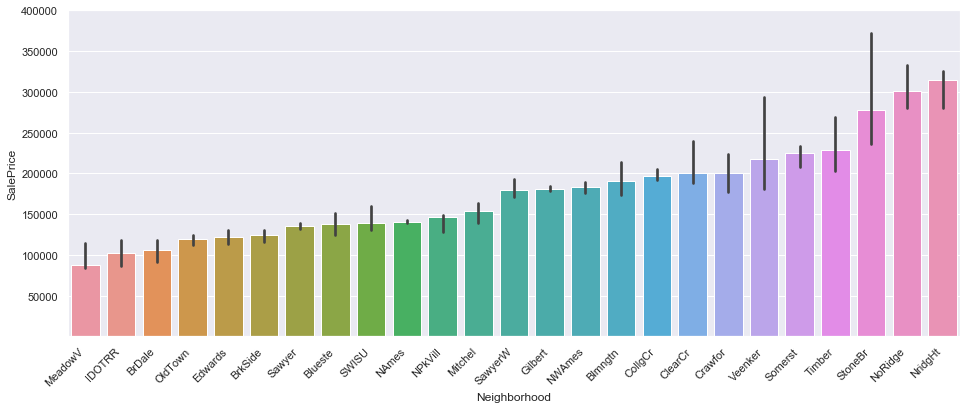

In [19]:
neigh_order = data.groupby('Neighborhood')['SalePrice'].median().sort_values().index
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Neighborhood', y='SalePrice', data=data, order=neigh_order, estimator=np.median, ax=ax);
plt.ylim(11,400000);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

**Since we see that there is an impact on the sales price depending on the neighbourhoods. Let's encode it:**

In [20]:
neighbourhoods = data.Neighborhood.unique()
np.sort(neighbourhoods) 

array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype=object)

In [21]:
# Covert it into a numerical value
data.Neighborhood.replace(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25], inplace=True)

In [22]:
#Let's check if it worked:
data.Neighborhood.unique()

array([ 6, 25,  7, 16, 12, 22, 15, 18,  4, 20, 17, 13, 21, 10, 11,  8, 24,
        9, 23,  5, 14,  1,  3, 19,  2])

In [23]:
# Decided to drop all the categorical data with the exception of Neighbourhood because: 
    # looking at it we see that it doesn't add that much value. 
    # Because they are very subjective 
    # Also because they don't have variability.
    
data = data.drop(columns=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'])

#We check that we don't have any remaining categorical data: 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 40 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Neighborhood     1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null int64
BsmtFinSF2       1460 non-null int64
BsmtUnfSF        1460 non-null int64
TotalBsmtSF      1460 non-null int64
1stFlrSF         1460 non-null int64
2ndFlrSF         1460 non-null int64
LowQualFinSF     1460 non-null int64
GrLivArea        1460 non-null int64
BsmtFullBath     1460 non-null int64
BsmtHalfBath     1460 non-null int64
FullBath         1460 non-null int64
HalfBath         1460 non-null int64
BedroomAbvGr     1460 non-null int64
KitchenAbvGr     1460 non-null int64
T

In [24]:
# Delete all columns where more than 75% of the info == 0: 
del data['BsmtFinSF2']
del data['LowQualFinSF']
del data['BsmtFullBath']
del data['BsmtHalfBath']
del data['KitchenAbvGr']
del data['EnclosedPorch']
del data['3SsnPorch']
del data['ScreenPorch']
del data['MiscVal']

In [25]:
#Let's check the data: 
data.head()

Id  MSSubClass  LotFrontage  LotArea  Neighborhood  OverallQual  \
0   1          60         65.0     8450             6            7   
1   2          20         80.0     9600            25            6   
2   3          60         68.0    11250             6            7   
3   4          70         60.0     9550             7            7   
4   5          60         84.0    14260            16            8   

   OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  ...  GarageYrBlt  \
0            5       2003          2003       196.0  ...       2003.0   
1            8       1976          1976         0.0  ...       1976.0   
2            5       2001          2002       162.0  ...       2001.0   
3            5       1915          1970         0.0  ...       1998.0   
4            5       2000          2000       350.0  ...       2000.0   

   GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  PoolArea  PoolQC  MoSold  \
0           2         548           0           61         0       0       2   
1           2         460         298            0         0       0       5   
2           2         608           0           42         0       0       9   
3           3         642           0           35         0       0       2   
4           3         836         192           84         0       0      12   

   YrSold  SalePrice  
0    2008     208500  
1    2007     181500  
2    2008     223500  
3    2006     140000  
4    2008     250000  

[5 rows x 31 columns]

In [26]:
#Let's print the names of the remaining variables to use them in the future: 
data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'PoolArea', 'PoolQC', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

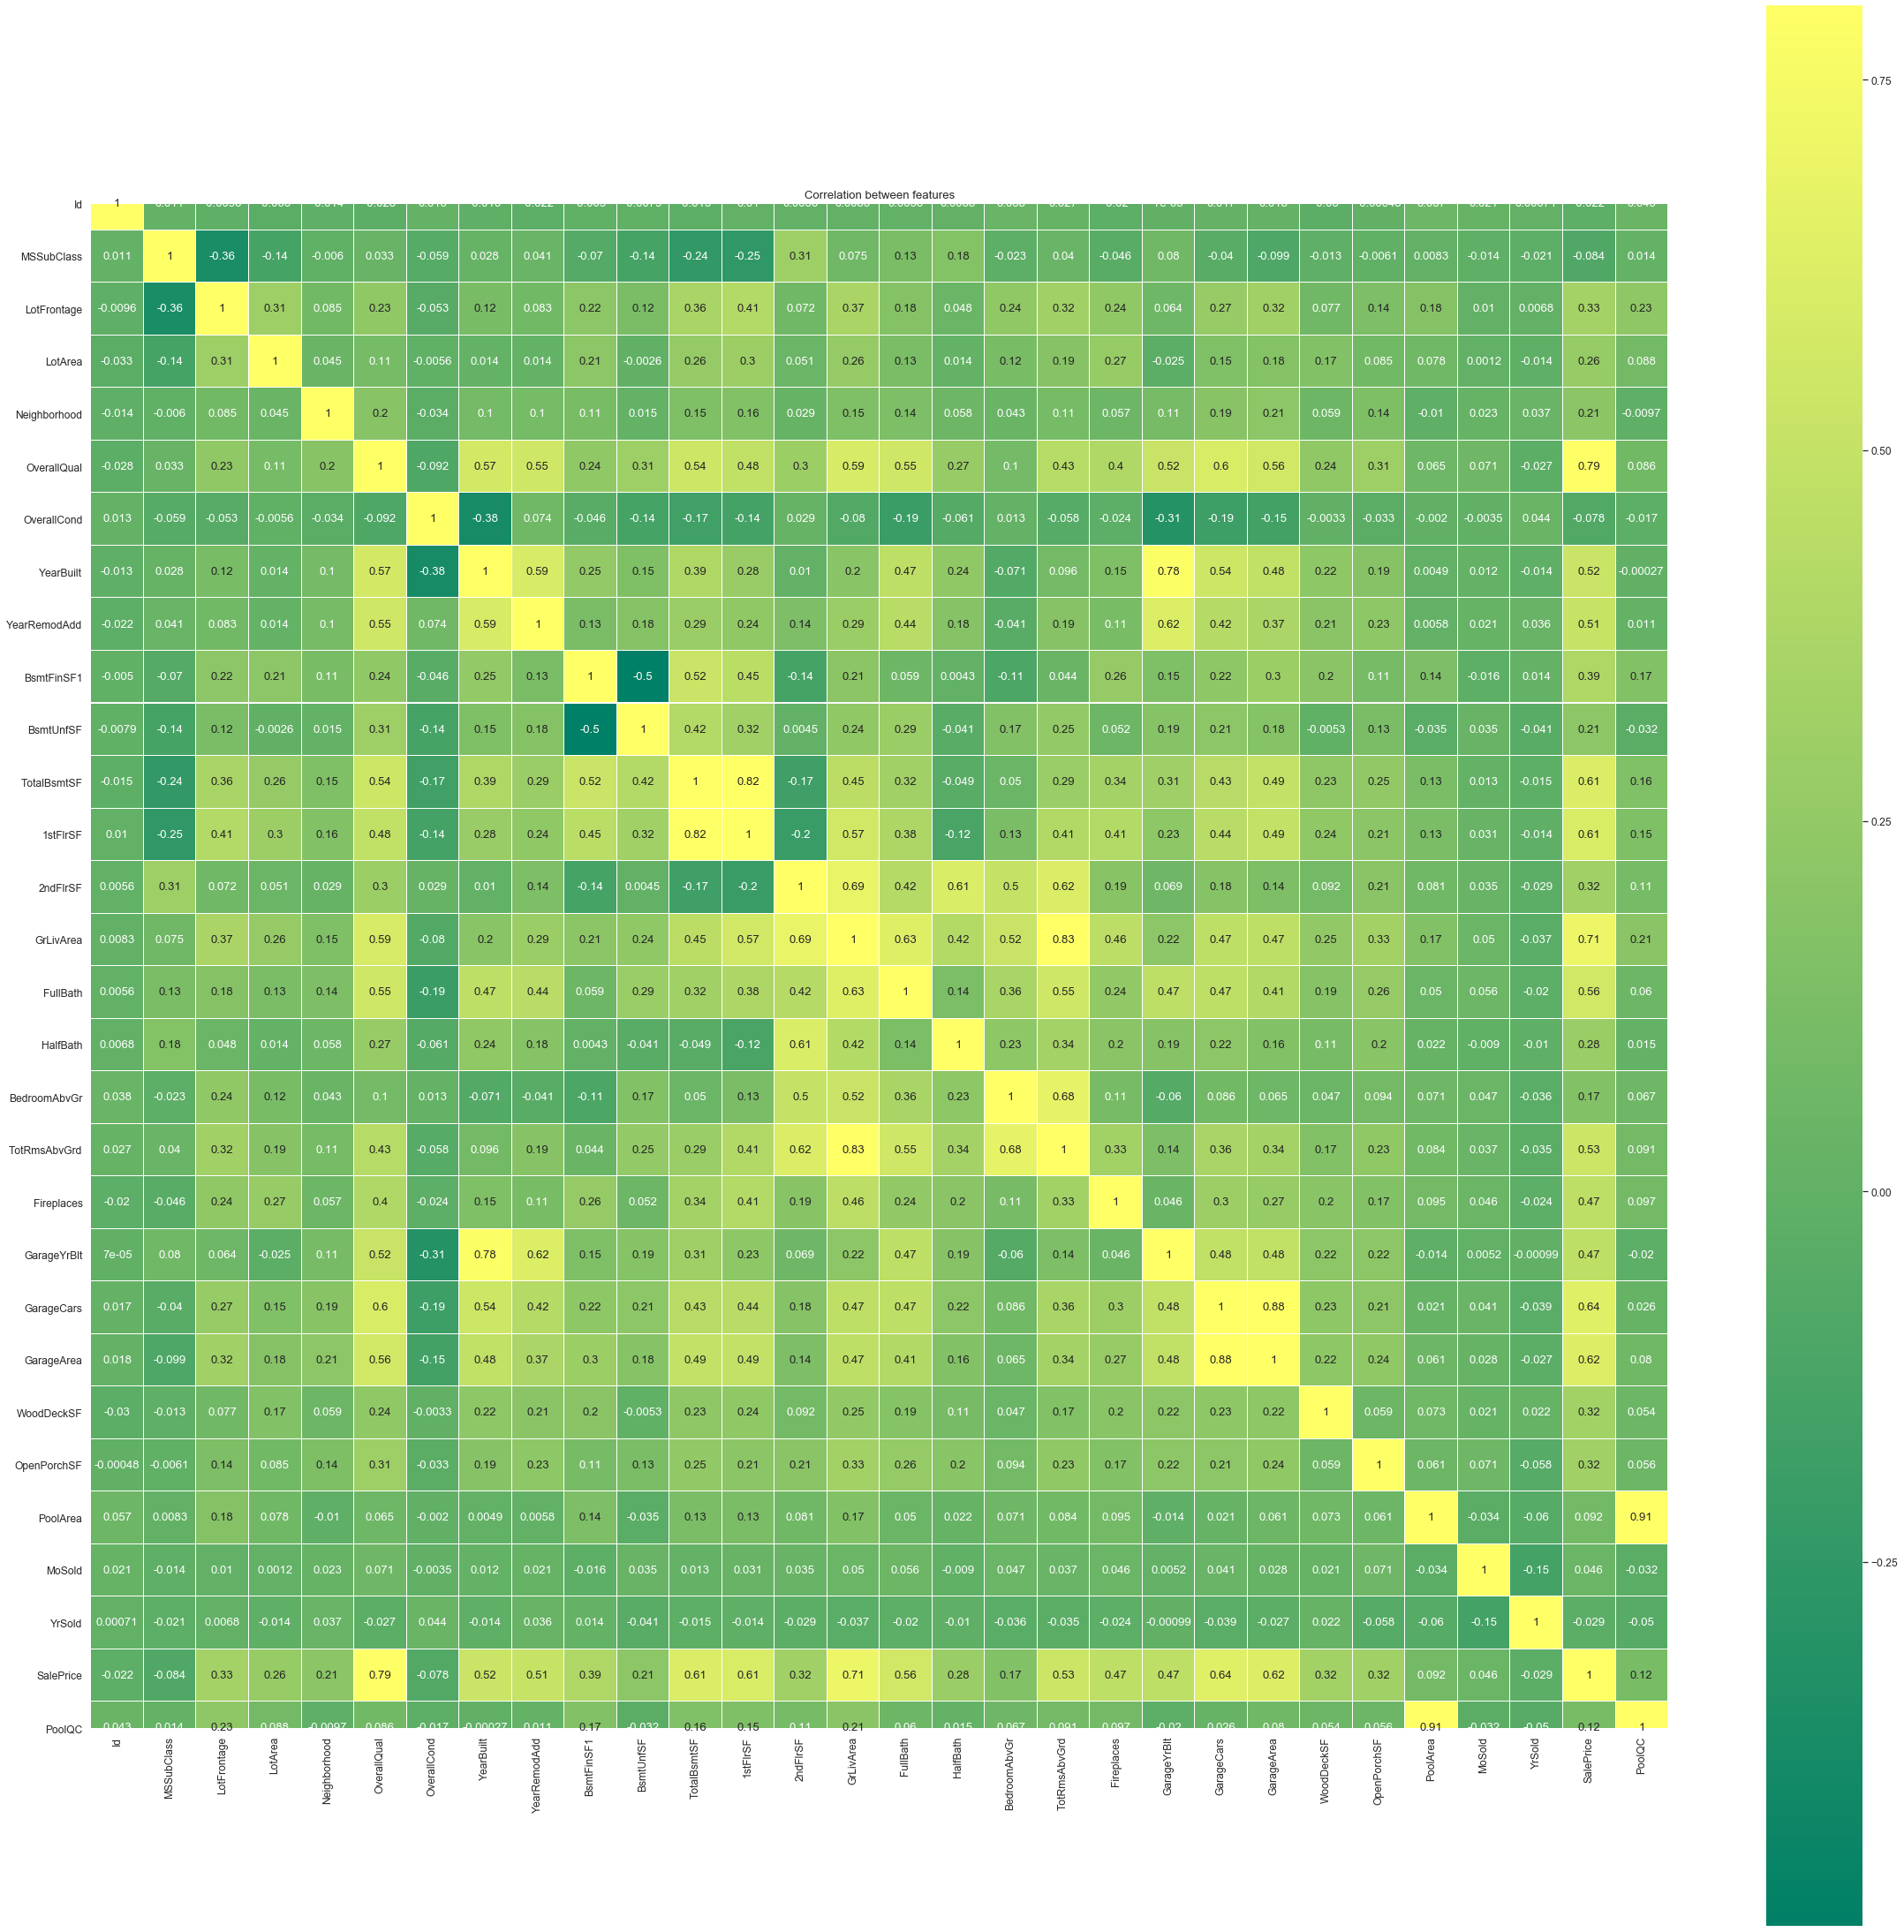

In [27]:
# We are going to make a correlation map in order to see the overal correlations with Sales Price. 
corrMatrix = data[['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'Neighborhood',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'PoolArea', 'MoSold', 'YrSold', 'SalePrice', 'PoolQC']].corr()


sns.set(font_scale=1.10)
plt.figure(figsize=(40, 40))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='summer',linecolor="white")
plt.title('Correlation between features');

In [28]:
# Since area related features are very important to determine house prices, 
# we add one more feature which is the total area of basement, first and second floor areas of each house
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

In [29]:
# Since we have a lot of variables, we check the correlation in a list, which makes it easier to understand the correlations: 
corr2 = data.corr()["SalePrice"]
corr2[np.argsort(corr2, axis=0)[::-1]]

SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.782260
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.475241
GarageYrBlt     0.470177
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.334901
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
LotArea         0.263843
BsmtUnfSF       0.214479
Neighborhood    0.210851
BedroomAbvGr    0.168213
PoolQC          0.119680
PoolArea        0.092404
MoSold          0.046432
Id             -0.021917
YrSold         -0.028923
OverallCond    -0.077856
MSSubClass     -0.084284
Name: SalePrice, dtype: float64

**It honestly surprises me that Yr sold, Pool and Neighbourhood have such a low correlation. I would have said thhought that they would be key variables.**

In [30]:
# We will consider as the ones who have a high correlations the ones that are above 50%: 
df_corr = data.corr()['SalePrice']
good_features = df_corr[abs(df_corr) >= 0.5].sort_values(ascending=False)
                            #abs turns any number into an absolute value, positive or negative correlations will stay
bad_features = pd.DataFrame(df_corr[abs(df_corr) < 0.5].sort_values(ascending=False))

print("There are {} strongly correlated variables with SalePrice:\n{}".format(len(good_features), good_features))

# Overalquality can be very subjective 
# Garage cars & area is more or less the same so we keep cars because it's more correlated.

There are 12 strongly correlated variables with SalePrice:
SalePrice       1.000000
OverallQual     0.790982
TotalSF         0.782260
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


**Now we are going to drop all the columns that have a lower correlation of 50%, with some exceptions:**

- We won't drop Neighbourhood, YearSold and Pool. Because even they have a low correlation. I believe they have a lot to do with the actual price, so we are going to check with other methods.**

- Since we created a new feature (TotalSF), which is the total area of basement, by taking into account first and second floor areas of each house. (TotalBsmtSF + 1stFlrSF and 2ndFlrSF), and those new feature has more correlation than them individually. We are going to drop those, and remain only with the total one. 

In [31]:
data.drop(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 
       'OverallCond', 'BsmtFinSF1', 'MasVnrArea',
       'BsmtUnfSF', '2ndFlrSF', 
       'HalfBath', 'BedroomAbvGr',
       'Fireplaces', 'GarageYrBlt' , 'WoodDeckSF',
       'OpenPorchSF', 'PoolArea', 'MoSold', 'TotalBsmtSF', '1stFlrSF', 'GarageArea'], axis=1, inplace=True)

## Forth Step: Exploratory Data Analysis

**Exploring our new dataset:** 

In [32]:
data.head()

Neighborhood  OverallQual  YearBuilt  YearRemodAdd  GrLivArea  FullBath  \
0             6            7       2003          2003       1710         2   
1            25            6       1976          1976       1262         2   
2             6            7       2001          2002       1786         2   
3             7            7       1915          1970       1717         1   
4            16            8       2000          2000       2198         2   

   TotRmsAbvGrd  GarageCars  PoolQC  YrSold  SalePrice  TotalSF  
0             8           2       0    2008     208500     2566  
1             6           2       0    2007     181500     2524  
2             6           2       0    2008     223500     2706  
3             7           3       0    2006     140000     2473  
4             9           3       0    2008     250000     3343

In [33]:
#We print the name of the remaining columns for further use. Now we have a total of 13 variables: 
data.columns 

Index(['Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'PoolQC', 'YrSold',
       'SalePrice', 'TotalSF'],
      dtype='object')

In [34]:
data.shape
# We remain with 13 variables: 

(1460, 12)

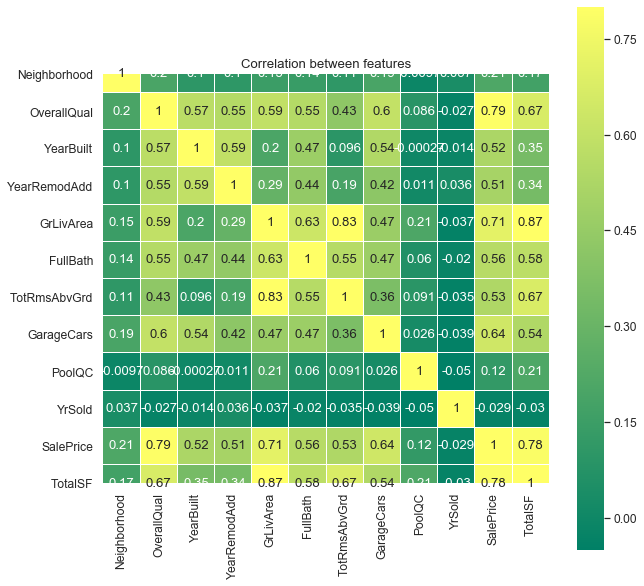

In [35]:
# We are going to make a correlation map in order to see the overal correlations with the remaining variables: 
corrMatrix = data[['Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
       'PoolQC', 'YrSold', 'SalePrice', 'TotalSF']].corr()


sns.set(font_scale=1.10)
plt.figure(figsize=(10, 10))

sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='summer',linecolor="white")
plt.title('Correlation between features');

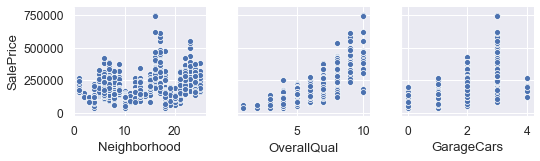

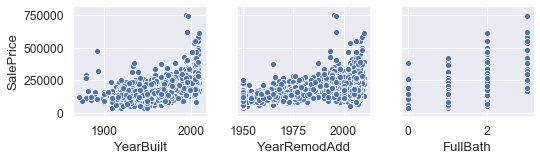

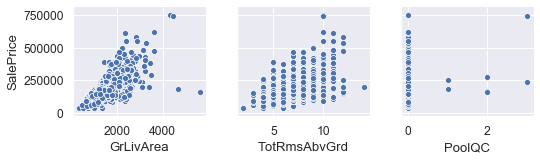

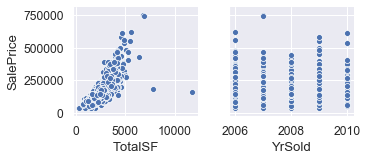

In [36]:
# Now for a bit more exploration / analysis to check for outliers 
sns.pairplot(data = data, x_vars = ['Neighborhood', 'OverallQual', 'GarageCars'], y_vars='SalePrice')
sns.pairplot(data = data, x_vars = ['YearBuilt','YearRemodAdd', 'FullBath'], y_vars='SalePrice')
sns.pairplot(data = data, x_vars = ['GrLivArea', 'TotRmsAbvGrd', 'PoolQC'], y_vars='SalePrice')
sns.pairplot(data = data, x_vars = ['TotalSF','YrSold'], y_vars='SalePrice')

**Conclusions:**
We can see that: 
- The price differs by **neighbourhood.** But it's not so clear.
- There is a linear relation between **OverallQual** and salesprice.
- Price goes up the more cars you can fit in the **garage** until 3. The 4rth car is not that valued.
- **YearBuilt:** We can see that the most recent builded houses tend to have higher prices. With some exceptions (outliers?) same with **year of remodelation**. 
- The more **bathrooms**, the higher the price. 
- **GrLivArea**: shows good relation with saleprices, but there are outliers present
- We can see a linear relation between **totalsf** and total **rooms available** with salesprice. But there are outliers present. 
- There's no correlation between **pool** and the final price. So we'll remove it. 
- **YRSold:** We can see some change of prices throghout the years. For example, it looks like in the 2006 the price of the houses was higher. 
- There are number of variables with zero values which are **skewing the data.**

In [37]:
data.drop(['PoolQC'], axis=1, inplace=True)

**We do a scaterplot for each variables:**

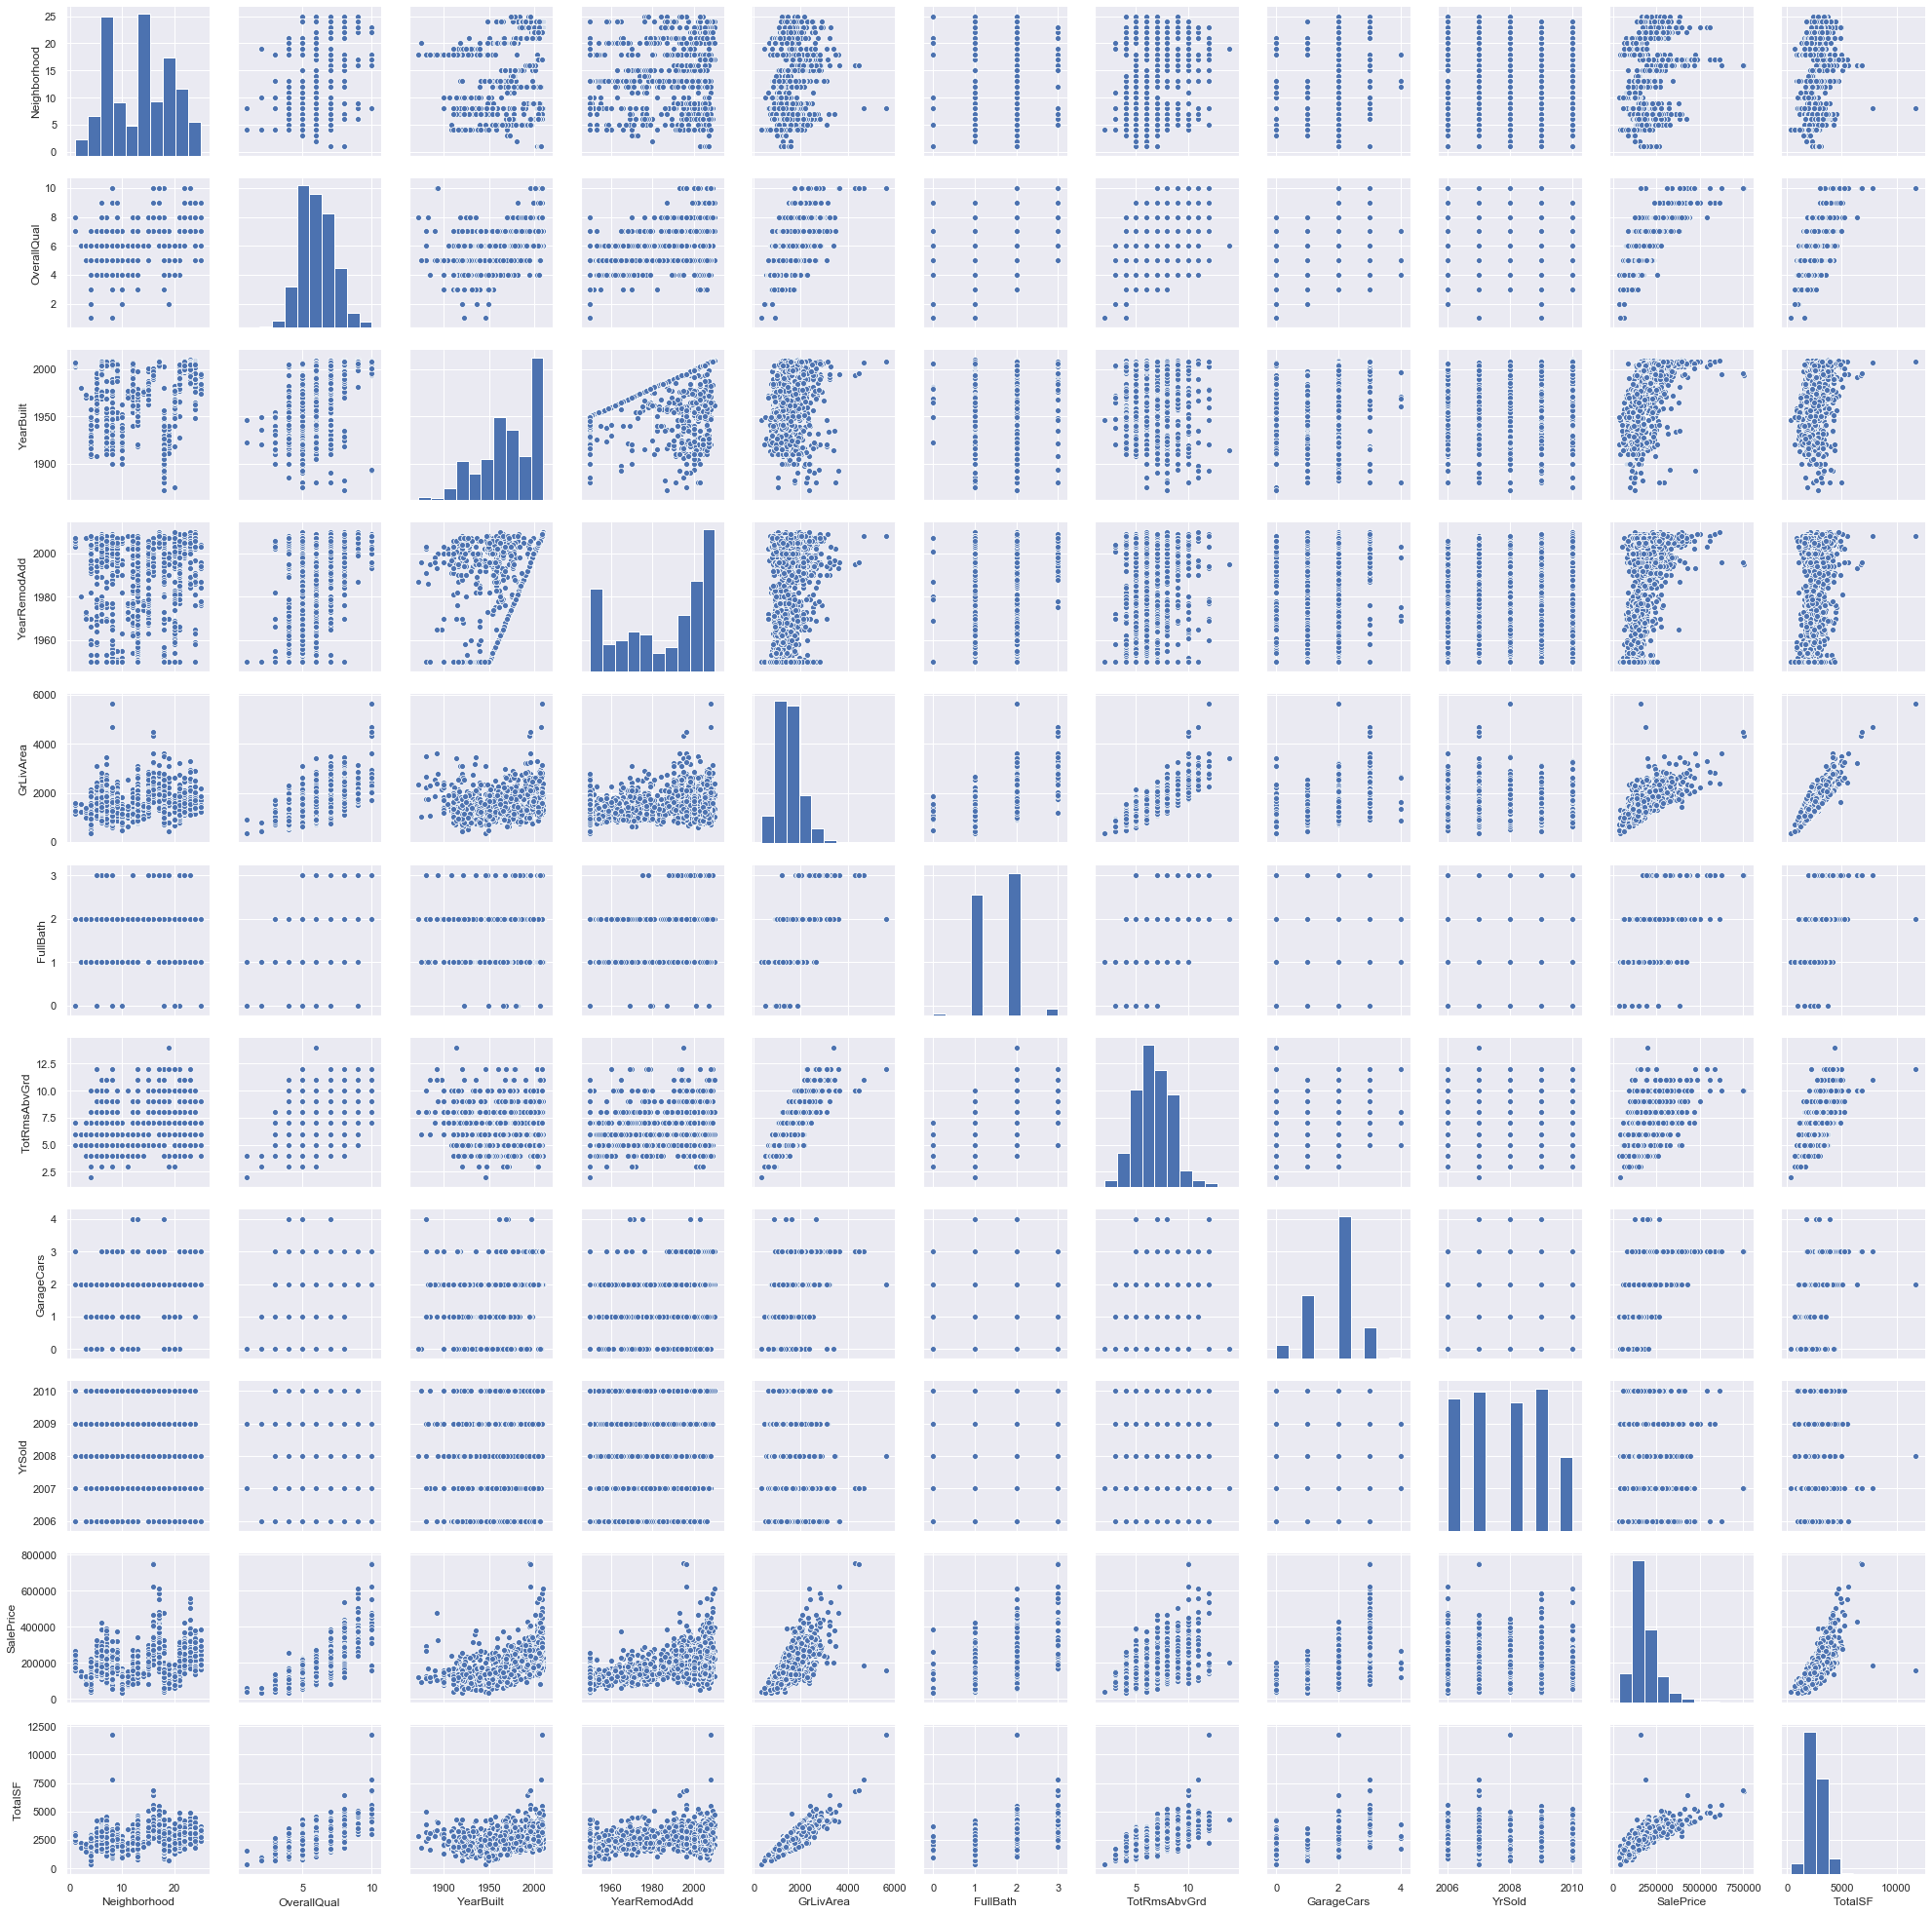

In [38]:
sns.set()
cols = ['Neighborhood', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
        'YrSold', 'SalePrice', 'TotalSF']
sns.pairplot(data[cols], height = 2.5)
plt.show();

**Conclusions:**
Apart from looking at the correlation with Sales Price. We can see some obvious relations between the variables themselves: 
- Total Rooms with GrLivArea 
- Total SF and Total Rooms 
- GrLivArea and Total SF
- OveralQuality and Total SF. 

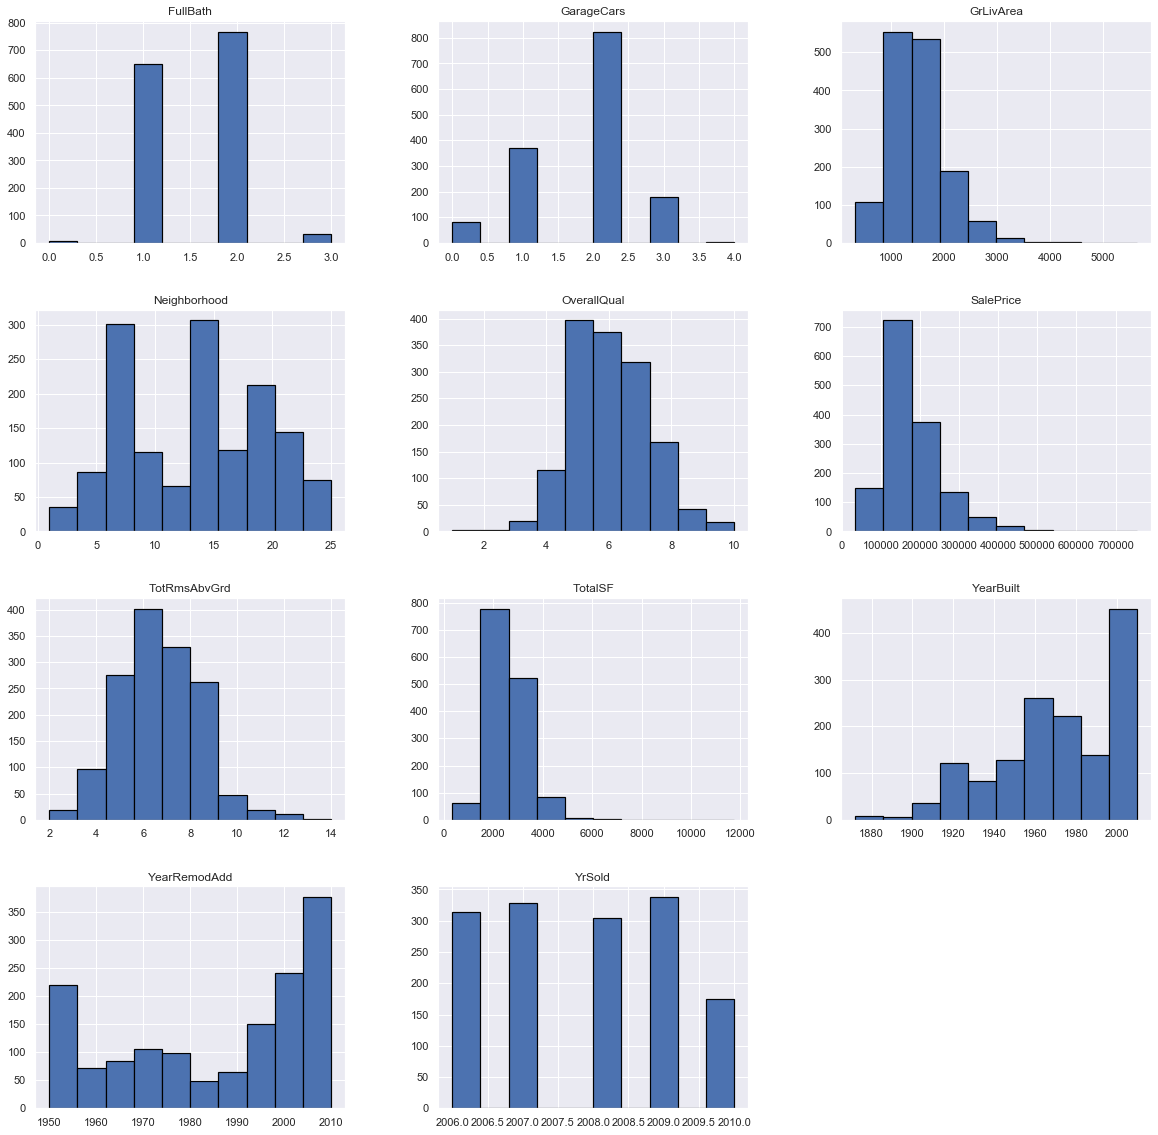

In [39]:
# Visulazing the distibution of the data for every feature
data.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

- The variance seems good in this variables. 
- OverallQual: Sale Price increases as the quality of the house increases.As expected!

In [40]:
data.describe()

Neighborhood  OverallQual    YearBuilt  YearRemodAdd    GrLivArea  \
count   1460.000000  1460.000000  1460.000000   1460.000000  1460.000000   
mean      13.251370     6.099315  1971.267808   1984.865753  1515.463699   
std        6.013735     1.382997    30.202904     20.645407   525.480383   
min        1.000000     1.000000  1872.000000   1950.000000   334.000000   
25%        8.000000     5.000000  1954.000000   1967.000000  1129.500000   
50%       13.000000     6.000000  1973.000000   1994.000000  1464.000000   
75%       18.000000     7.000000  2000.000000   2004.000000  1776.750000   
max       25.000000    10.000000  2010.000000   2010.000000  5642.000000   

          FullBath  TotRmsAbvGrd   GarageCars       YrSold      SalePrice  \
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000   
mean      1.565068      6.517808     1.767123  2007.815753  180921.195890   
std       0.550916      1.625393     0.747315     1.328095   79442.502883   
min       0.000000      2.000000     0.000000  2006.000000   34900.000000   
25%       1.000000      5.000000     1.000000  2007.000000  129975.000000   
50%       2.000000      6.000000     2.000000  2008.000000  163000.000000   
75%       2.000000      7.000000     2.000000  2009.000000  214000.000000   
max       3.000000     14.000000     4.000000  2010.000000  755000.000000   

            TotalSF  
count   1460.000000  
mean    2567.048630  
std      821.714421  
min      334.000000  
25%     2009.500000  
50%     2474.000000  
75%     3004.000000  
max    11752.000000

**Conclusions:**
- Neighbourhoods: 
    - There are 25 total neighbourhoods. 
    - The majority of houses are in the neighbourhood 13. 
- Overalquality: from the houses that we have available, they have an average of 6 overal quality from a max of 10.
- YearBuilt and YearRemodADD: The newest and rebuilded houses are from 2010. 

**Let's check our target variable: Sales Price**

In [41]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

- The minimum price is 349000
- The maximum price is 755000
- The mean is 180921,20

**Now let's look at the variables, one by one**:

Since the importance of keeping neighbours is not so clear yet. **We are going to check on the correlations by neighbourhood.**

/Users/ariadnacuffi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning:

invalid value encountered in true_divide

/Users/ariadnacuffi/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



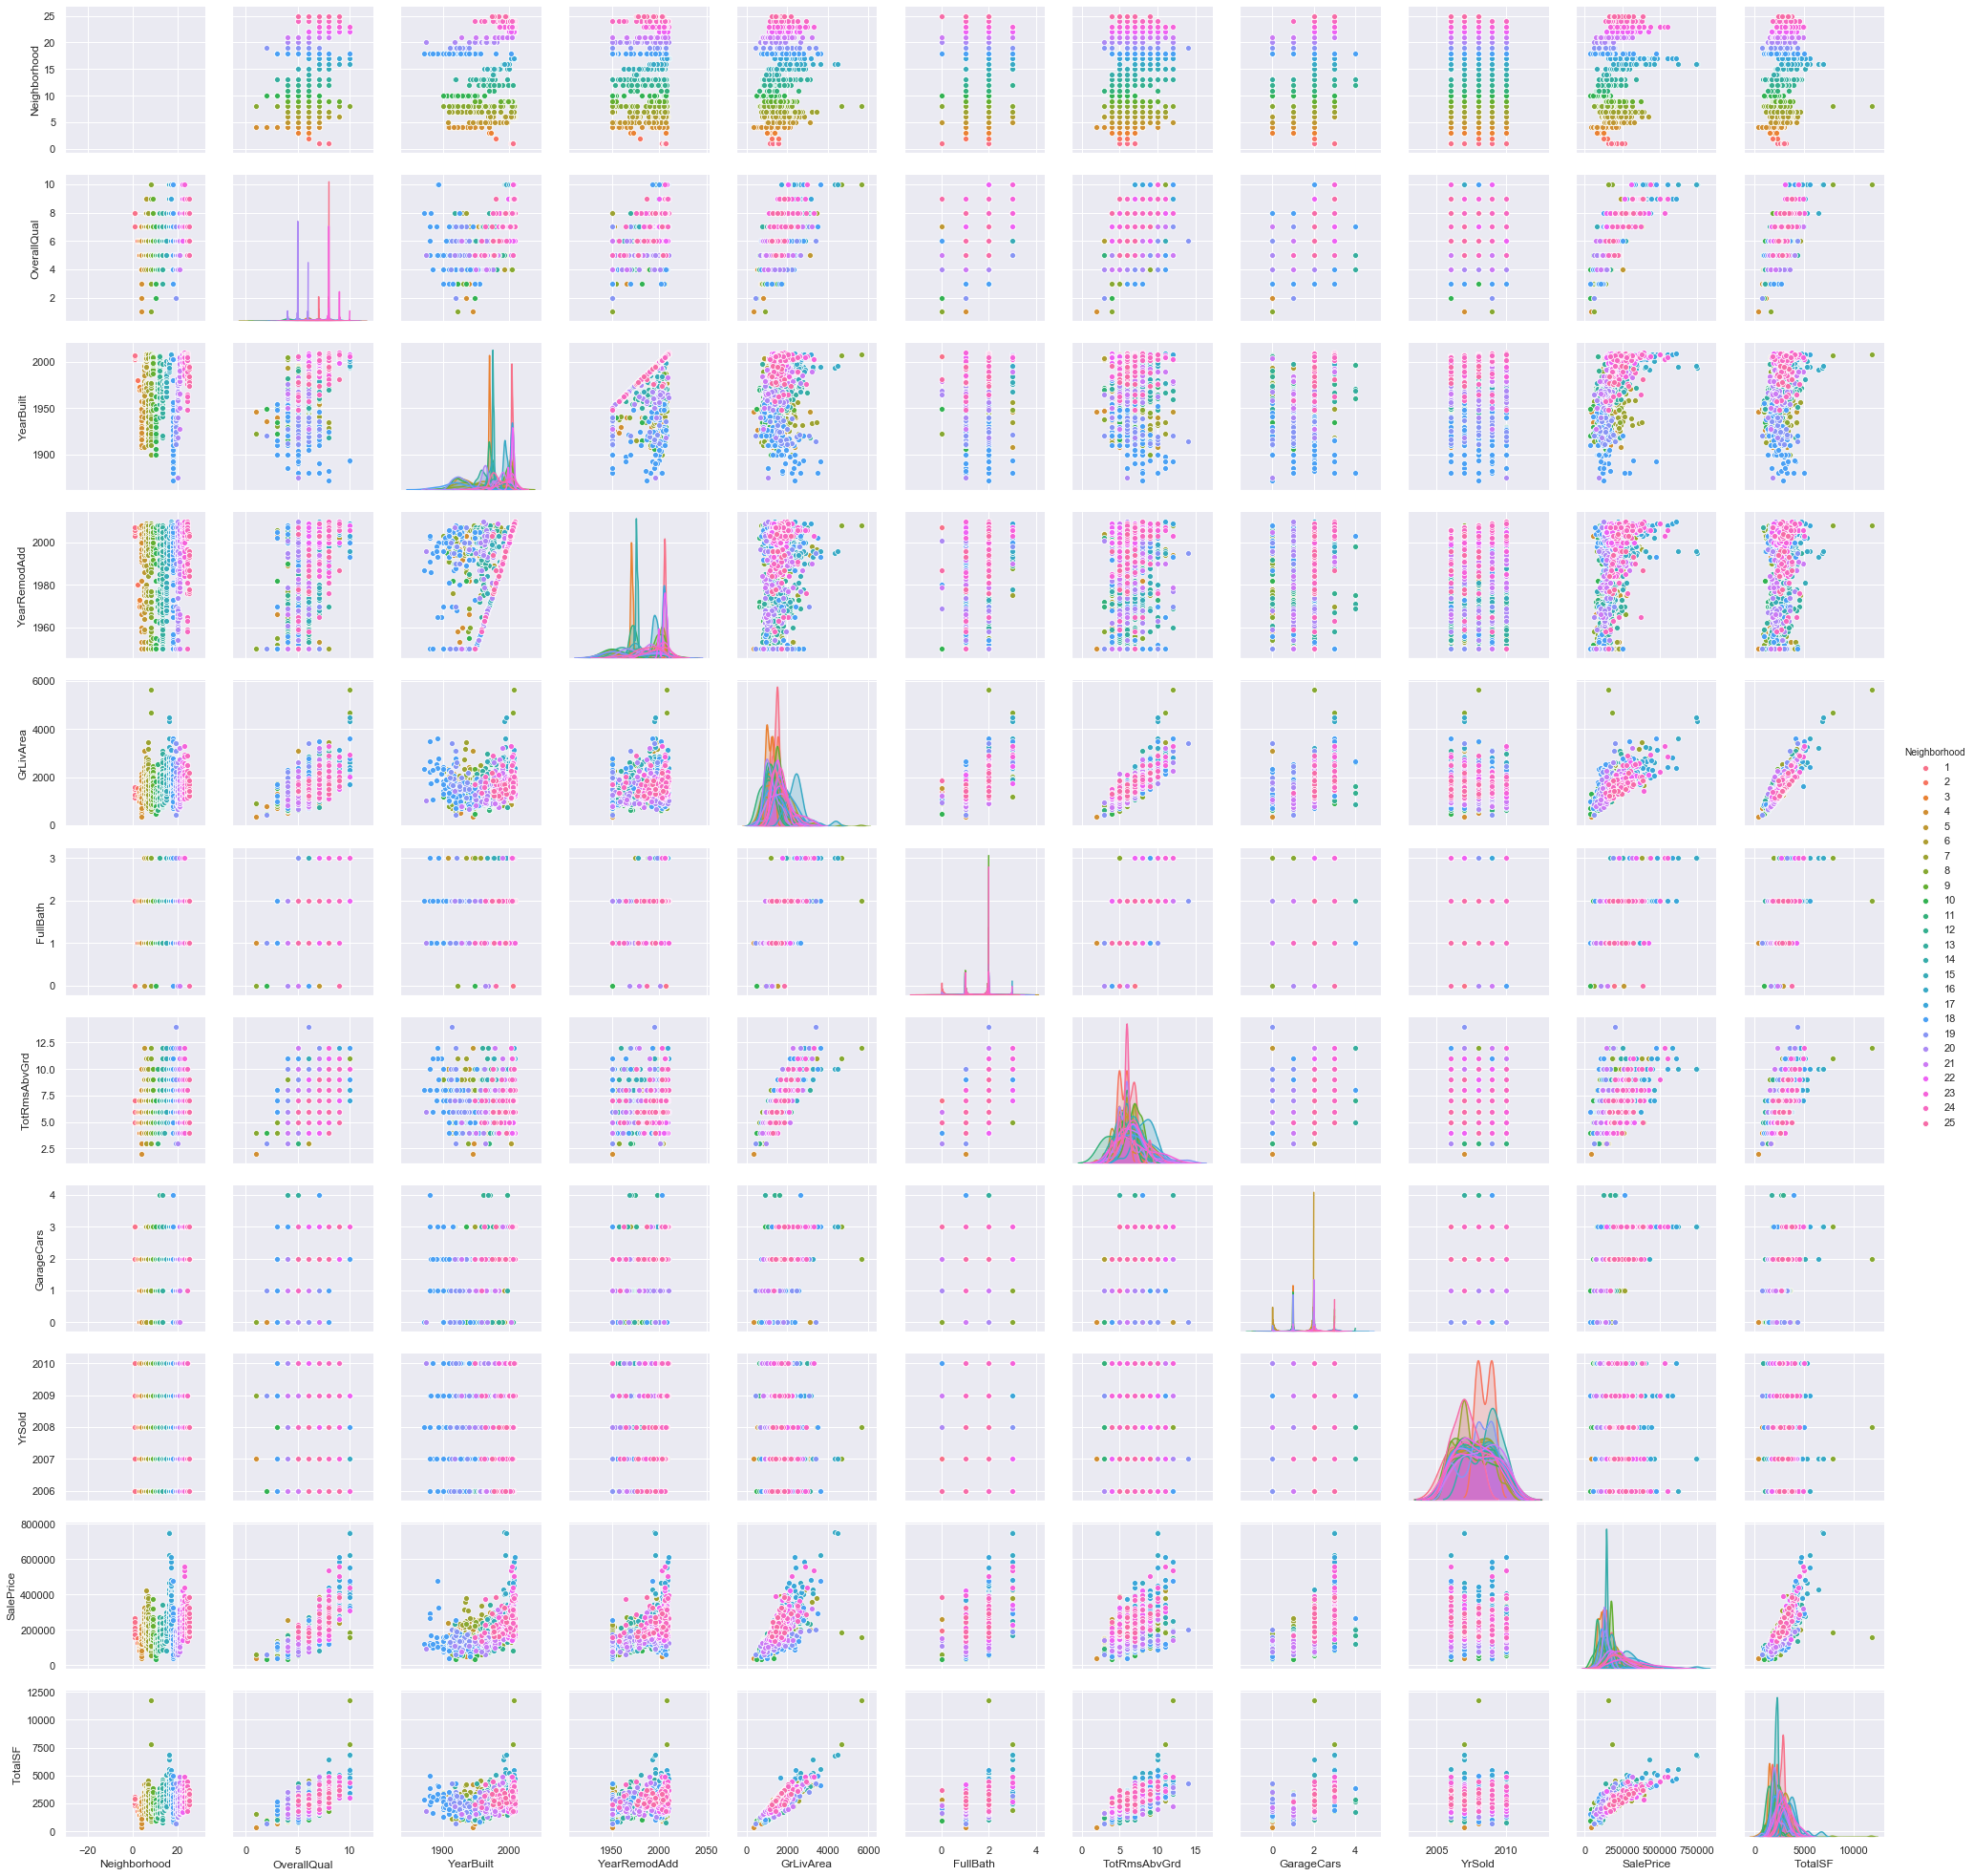

In [42]:
most_relevant = ['Neighborhood','OverallQual', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
        'YrSold', 'SalePrice', 'TotalSF']
sns.pairplot(data[most_relevant], hue='Neighborhood', palette="husl", height = 2.5)

It is not clear enough to extract conclusions over this. **So let's go back to the previous analysis and deep a bit deeper:**

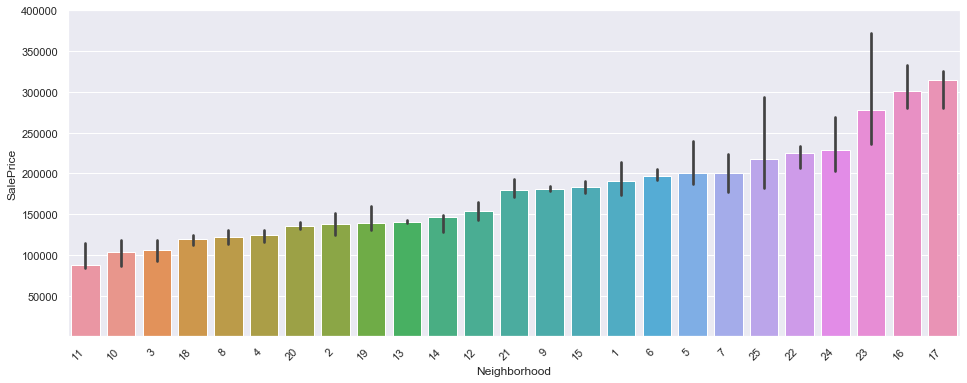

In [43]:
neigh_order = data.groupby('Neighborhood')['SalePrice'].median().sort_values().index
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Neighborhood', y='SalePrice', data=data, order=neigh_order, estimator=np.median, ax=ax);
plt.ylim(11,400000);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

There's a clear difference of price between neighbourhoods. With some outliers. Beeing 11 the cheapest neighbourhood and 17 the most expensive. 

**Let's see how many houses we have in each neighbourhood, to see if there's offer/demand impact:**

In [44]:
 data['Neighborhood'].value_counts().sort_index()

1      17
2       2
3      16
4      58
5      28
6     150
7      51
8     100
9      79
10     37
11     17
12     49
13    225
14      9
15     73
16     41
17     77
18    113
19     25
20     74
21     59
22     86
23     25
24     38
25     11
Name: Neighborhood, dtype: int64

The neighbourhood with most houses is not one of the cheapest, and the neighbourhood with less houses isn't the one with the higher prices. 

In [45]:
sorted_neighbourhoods = np.sort(neighbourhoods)
sorted_neighbourhoods

array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

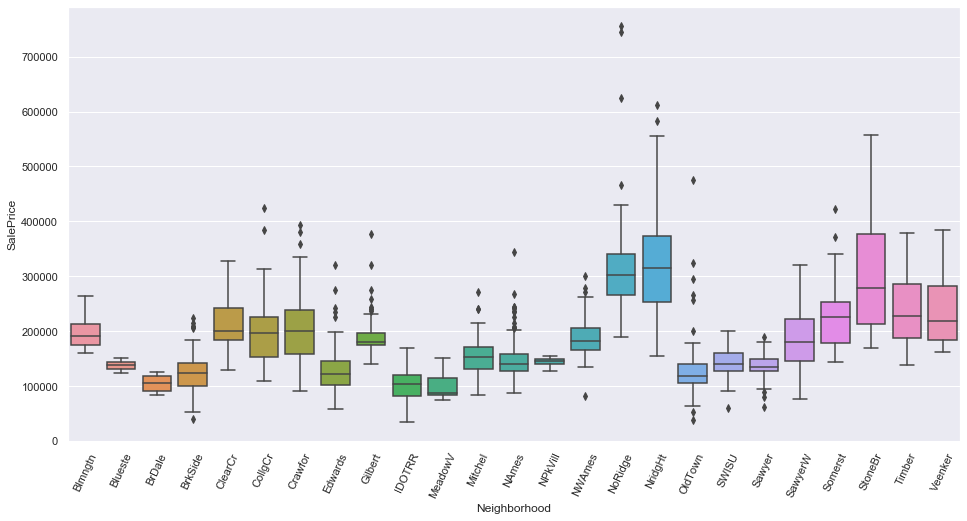

In [46]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x='Neighborhood', y='SalePrice', data=data)
ax.set_xticklabels(sorted_neighbourhoods)
plt.xticks(rotation=65)

There are very clear differences in house price acording to neighbourhood. The neighbourhoods with higher average house prices seem to have greater ranges on the whole.

**Now we'll look at YrSold** with the goal of seeing the evolution of house price by year:

In [47]:
data['YrSold'].astype('int64')

0       2008
1       2007
2       2008
3       2006
4       2008
        ... 
1455    2007
1456    2010
1457    2010
1458    2010
1459    2008
Name: YrSold, Length: 1460, dtype: int64

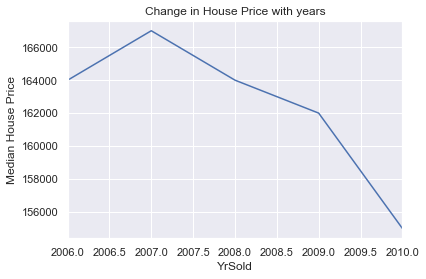

In [48]:
# HOMEWORK: NO POSAR DECIMALS ALS ANYS!!!! 
data.groupby('YrSold')['SalePrice'].median().plot()
plt.ylabel('Median House Price')
plt.title('Change in House Price with years');

We can see an unsual thing that the House Price is decreasing in year 2008-09.

In [49]:
import plotly.express as px
df = px.data.tips()
fig = px.box(data, x="YearBuilt", y="SalePrice")
fig.show()

- We can see that the price of the house decreases as it becomes older.
- There was a peak in the 30ties
- Tthis variable is could be very useful in predicting the housing price.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60]),
 <a list of 61 Text xticklabel objects>)

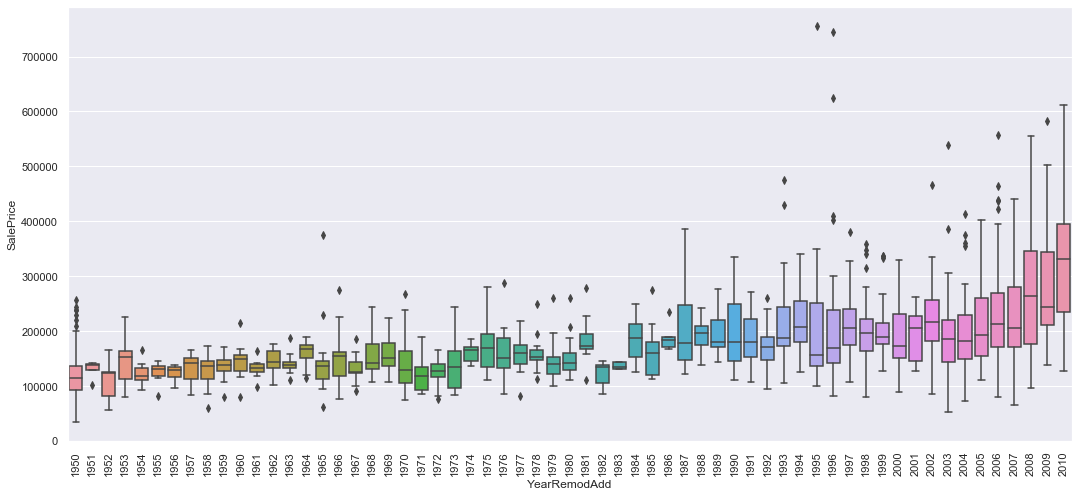

In [50]:
plt.figure(figsize=(18,8))
sns.boxplot(x='YearRemodAdd', y='SalePrice', data=data)
plt.xticks(rotation=90)

There is almost a stronger upward trend between YearRemodAdd and Sale Price than there is between Year Built and Sale Price.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

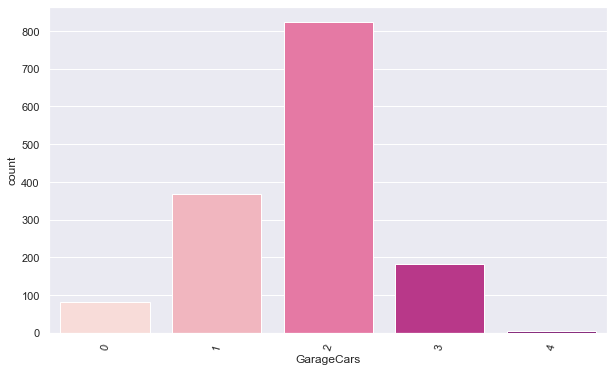

In [51]:
# GarageCars: 
plt.figure(figsize=(10,6))
sns.countplot(x='GarageCars', data=data, palette='RdPu')
plt.xticks(rotation=75)

In [52]:
data['GarageCars'].value_counts().sort_index()

0     81
1    369
2    824
3    181
4      5
Name: GarageCars, dtype: int64

The majority of houses have space for 2 cars, very few have for 4.

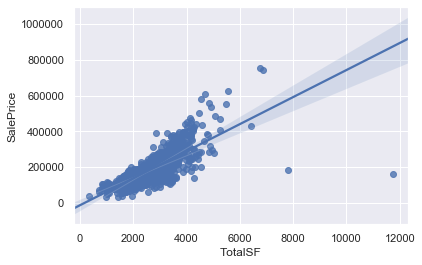

In [53]:
sns.regplot(x='TotalSF', y='SalePrice', data=data);

### Fifth Step: Dealing with outliers and Bias

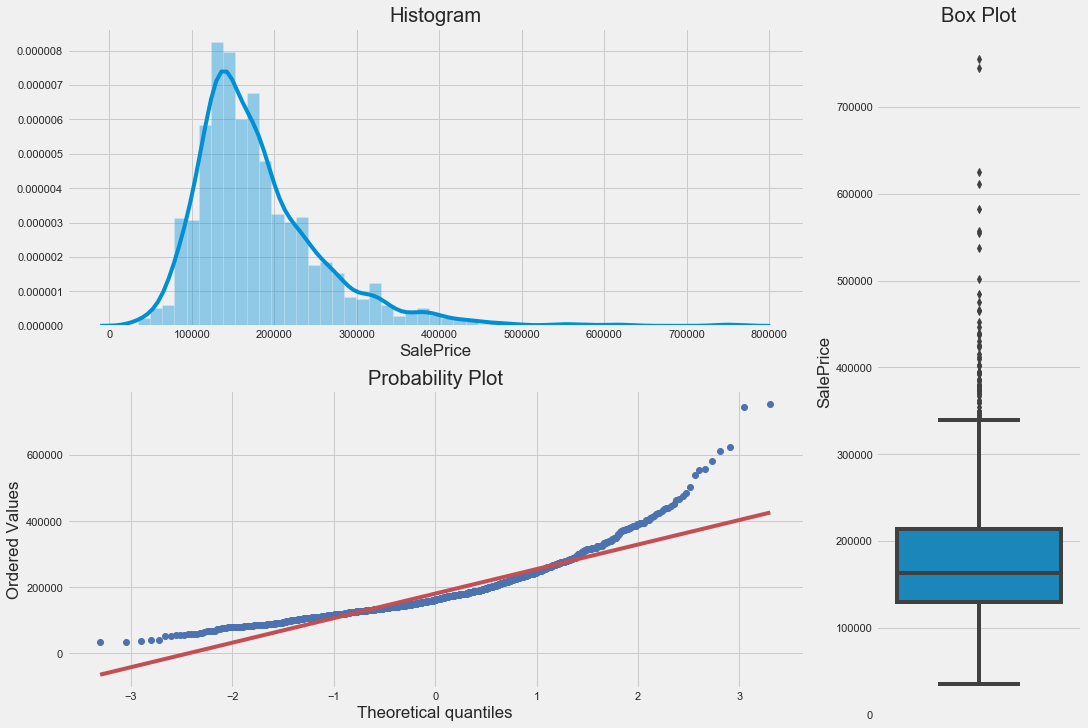

In [54]:
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(15,10))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(data.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(data.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(data.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(data, 'SalePrice')

In [55]:
print("Skewness: " + str(data['SalePrice'].skew()))
print("Kurtosis: " + str(data['SalePrice'].kurt()))

# We can see that Sales Price: 
    # Deviate from the normal distribution.
    # Have appreciable positive skewness.

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529



 mu = 12.02 and sigma = 0.40



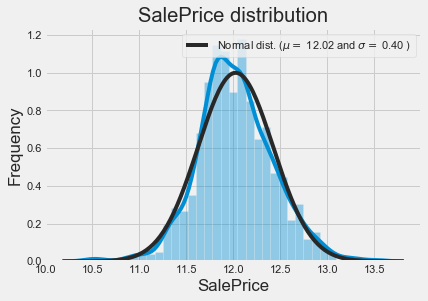

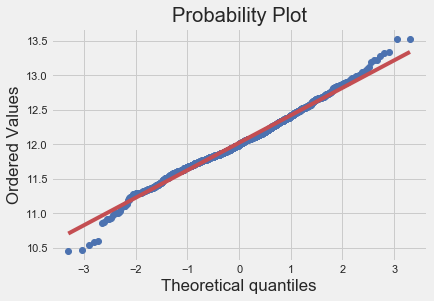

In [56]:
# The target variable is right skewed. 
# We need to transform this variable and make it more normally distributed.

from scipy.stats import norm, skew #for some statistics
from scipy import stats
from scipy.stats import norm, skew #for some statistics

#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
data["SalePrice"] = np.log1p(data["SalePrice"])

#Check the new distribution 
sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

In [57]:
# We managed to reduce Kurtosis and Skewness: 
print("Skewness: " + str(data['SalePrice'].skew()))
print("Kurtosis: " + str(data['SalePrice'].kurt()))

Skewness: 0.12134661989685329
Kurtosis: 0.809519155707878


In [58]:
# Let's define an upper and lower limit based on the confidence level of 99%. The values that are located above this limit will be considered as 
# Outlier so let's remove them.
upperlimit = np.percentile(data.SalePrice.values, 99)
lowerlimit = np.percentile(data.SalePrice.values, 1)
print('UpperLimit', upperlimit)
print('Lowerlimit', lowerlimit)

UpperLimit 13.000325260398293
Lowerlimit 11.03187249557132


Text(0, 0.5, 'Sale Price')

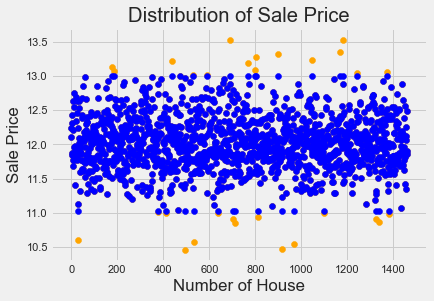

In [59]:
# Let's define an upper and lower limit based on the confidence level of 99%. The values that are located above this limit will be considered as 
# Outlier so let's remove them.
#upperlimit = np.percentile(train.SalePrice.values, 99)
#lowerlimit = np.percentile(train.SalePrice.values, 1)

# Raw values of houses are plotted in orange
plt.scatter(range(data.shape[0]), data["SalePrice"].values,color='orange')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of Houses")
plt.ylabel("Sale Price");

data['SalePrice'].loc[data['SalePrice']>upperlimit] = upperlimit
data['SalePrice'].loc[data['SalePrice']<lowerlimit] = lowerlimit

# Corrected values, after removing the outliers

plt.scatter(range(data.shape[0]), data["SalePrice"].values,color='blue')
plt.title("Distribution of Sale Price")
plt.xlabel("Number of House")
plt.ylabel("Sale Price")

The orange data points are the outliers that we have removed.

In [60]:
data.head()

Neighborhood  OverallQual  YearBuilt  YearRemodAdd  GrLivArea  FullBath  \
0             6            7       2003          2003       1710         2   
1            25            6       1976          1976       1262         2   
2             6            7       2001          2002       1786         2   
3             7            7       1915          1970       1717         1   
4            16            8       2000          2000       2198         2   

   TotRmsAbvGrd  GarageCars  YrSold  SalePrice  TotalSF  
0             8           2    2008  12.247699     2566  
1             6           2    2007  12.109016     2524  
2             6           2    2008  12.317171     2706  
3             7           3    2006  11.849405     2473  
4             9           3    2008  12.429220     3343

In [61]:
data = data[data['SalePrice'] < upperlimit]
data = data[data['SalePrice'] > lowerlimit]

In [62]:
data.head()

Neighborhood  OverallQual  YearBuilt  YearRemodAdd  GrLivArea  FullBath  \
0             6            7       2003          2003       1710         2   
1            25            6       1976          1976       1262         2   
2             6            7       2001          2002       1786         2   
3             7            7       1915          1970       1717         1   
4            16            8       2000          2000       2198         2   

   TotRmsAbvGrd  GarageCars  YrSold  SalePrice  TotalSF  
0             8           2    2008  12.247699     2566  
1             6           2    2007  12.109016     2524  
2             6           2    2008  12.317171     2706  
3             7           3    2006  11.849405     2473  
4             9           3    2008  12.429220     3343

Max:,  5642
Min: 520
Standard Deviation: 497.8843578242789


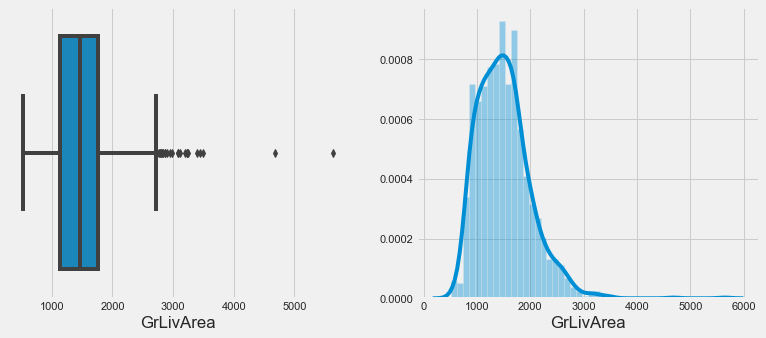

In [63]:
#GrLivArea: 

plt.figure(figsize=(12,5))
plt.subplot(121)
sns.boxplot(x='GrLivArea', data=data)
plt.subplot(122)
sns.distplot(data.GrLivArea, hist=True)
print("Max:, ", data.GrLivArea.max())
print("Min:", data.GrLivArea.min())
print("Standard Deviation:", data.GrLivArea.std())

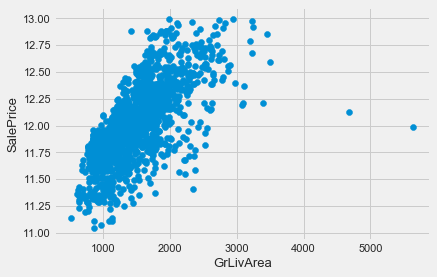

In [64]:
# We can see at the bottom right two with extremely large GrLivArea that are of a low price. 
# These values are huge oultliers. Therefore, we can safely delete them.
fig, ax = plt.subplots()
ax.scatter(x = data['GrLivArea'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

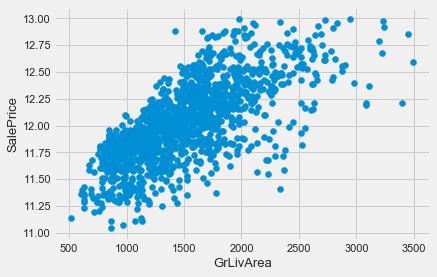

In [65]:
#Deleting outliers
data = data.drop(data[(data['GrLivArea']>4000) & (data['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(data['GrLivArea'], data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

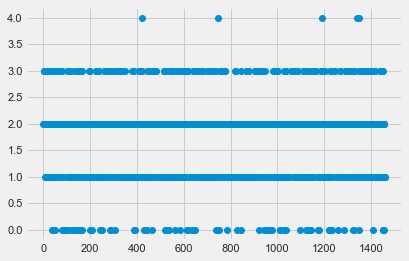

In [66]:
# GarageCars: 
import matplotlib.pyplot as plt
plt.plot(data["GarageCars"], marker = "o", linestyle = "None")

In [67]:
import plotly.express as px
df = px.data.tips()
fig = px.box(data, x="OverallQual", y="SalePrice")
fig.show()

We see that this is an apporximately linear relationship (medians are in increasing order). 
There are no severe outliers.

In [68]:
import plotly.express as px
fig = px.box(data, y="TotalSF")
fig.show()

In [69]:
data = data[data.TotalSF < 5500] # we remove all rows with values higher than 4000 in this variable

In [70]:
import plotly.express as px
fig = px.box(data, y="TotalSF")
fig.show()

**Conclusions:** Apart from the YearBuilt and YearRemodAdd variables which are slightly different, all variables show very high levels of Kurtosis and positive skew. Therefore I hope to decrease the range drastically by removing the outliers which will hopefully produce a more Gaussian distribution.

## Modeling

In [71]:
data.head()

Neighborhood  OverallQual  YearBuilt  YearRemodAdd  GrLivArea  FullBath  \
0             6            7       2003          2003       1710         2   
1            25            6       1976          1976       1262         2   
2             6            7       2001          2002       1786         2   
3             7            7       1915          1970       1717         1   
4            16            8       2000          2000       2198         2   

   TotRmsAbvGrd  GarageCars  YrSold  SalePrice  TotalSF  
0             8           2    2008  12.247699     2566  
1             6           2    2007  12.109016     2524  
2             6           2    2008  12.317171     2706  
3             7           3    2006  11.849405     2473  
4             9           3    2008  12.429220     3343

In [72]:
data = data.drop(columns=['Neighborhood'])

In [73]:
data_copy = data.copy()

In [74]:
# We define our target variable 
y = data['SalePrice']
X = data.drop(['SalePrice'], axis = 1) 

In [75]:
# We split our data between train and test 
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [76]:
# We check: 
# view number of training and testing data
print('Our training target/prediction variable contains :',len(y_train) ,'rows')
print('Our training input variables contains :',len(X_train) ,'rows')
print('Our testing target/prediction variables contains :',len(y_test) ,'rows')
print('Our testing input variable contains :',len(X_test) ,'rows')

Our training target/prediction variable contains : 998 rows
Our training input variables contains : 998 rows
Our testing target/prediction variables contains : 429 rows
Our testing input variable contains : 429 rows


In [77]:
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [78]:
# Scaling the data for X 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [79]:
data = data.drop(columns=['MiscFeature', 'Alley', 'Fence', 'FireplaceQu'])

KeyError: "['MiscFeature' 'Alley' 'Fence' 'FireplaceQu'] not found in axis"

In [ ]:
# This is the data I will use in my models 
df_train = data[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars',
        'YrSold', 'SalePrice', 'TotalSF']]
df_train.shape

**PCA**

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=5)
x_pca = pca.fit_transform(X_std)

In [ ]:
expl = pca.explained_variance_ratio_                             
print('Explained variance of each PC:', np.around(expl,2))       
print('Cumulative explained variance:',round(sum(expl[0:5]),2))

In [ ]:
var_exp = expl[0:5]
cum_var_exp = np.around(np.cumsum(expl[0:5]),2)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='selecting-principal-components')

In [ ]:
X, y = df_train.drop(['SalePrice', 'YearBuilt', 'YearRemodAdd'], axis=1), df_train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [ ]:
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [ ]:
pca = PCA(n_components=4)
x_pca = pca.fit_transform(X_std)

In [ ]:
expl = pca.explained_variance_ratio_                             
print('Explained variance of each PC:', np.around(expl,2))       
print('Cumulative explained variance:',round(sum(expl[0:5]),2))

In [ ]:
var_exp = expl[0:5]
cum_var_exp = np.around(np.cumsum(expl[0:5]),2)

trace1 = dict(
    type='bar',
    x=['PC %s' %i for i in range(1,5)],
    y=var_exp,
    name='Individual'
)

trace2 = dict(
    type='scatter',
    x=['PC %s' %i for i in range(1,5)], 
    y=cum_var_exp,
    name='Cumulative'
)

data = [trace1, trace2]

layout=dict(
    title='Explained variance by different principal components',
    yaxis=dict(
        title='Explained variance in percent'
    ),
    annotations=list([
        dict(
            x=1.16,
            y=1.05,
            xref='paper',
            yref='paper',
            text='Explained Variance',
            showarrow=False,
        )
    ])
)

fig = dict(data=data, layout=layout)
iplot(fig, filename='selecting-principal-components')

**Linear Regression with most correlated variables**

In [ ]:
X_train.columns

In [ ]:
garage_cars, gc_test = np.array(X_train['GarageCars']).reshape(-1,1), np.array(X_test['GarageCars']).reshape(-1,1)
TotalSF, TF_test = np.array(X_train['TotalSF']).reshape(-1,1), np.array(X_test['TotalSF']).reshape(-1,1)
YrSold, YS_test = np.array(X_train['YrSold']).reshape(-1,1), np.array(X_test['YrSold']).reshape(-1,1)
gr_liv_area, gl_test = np.array(X_train['GrLivArea']).reshape(-1,1), np.array(X_test['GrLivArea']).reshape(-1,1)
OverallQual, oq_test = np.array(X_train['OverallQual']).reshape(-1,1), np.array(X_test['OverallQual']).reshape(-1,1)

In [ ]:
from sklearn.linear_model import LinearRegression
lreg1 = LinearRegression()
lreg1.fit(garage_cars, y_train)
y_pred1 = np.round(lreg1.predict(gc_test))

lreg2 = LinearRegression()
lreg2.fit(TotalSF, y_train)
y_pred2 = np.round(lreg2.predict(TF_test))

lreg3 = LinearRegression()
lreg3.fit(YrSold, y_train)
y_pred3 = np.round(lreg3.predict(YS_test))

lreg4 = LinearRegression()
lreg4.fit(gr_liv_area, y_train)
y_pred4 = np.round(lreg4.predict(gl_test))

lreg5 = LinearRegression()
lreg5.fit(OverallQual, y_train)
y_pred5 = np.round(lreg5.predict(oq_test))

In [ ]:
gc_test = gc_test.flatten()
TF_test = TF_test.flatten()
YS_test = YS_test.flatten()
gl_test = gl_test.flatten()
oq_test = oq_test.flatten()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=gc_test, y=y_test,
                    mode='markers',
                    name='Garage Cars Real Values'))
fig.add_trace(go.Scatter(x=gc_test, y=y_pred1,
                    mode='markers',
                    name='Garage Cars Predicted Values'))
fig.add_trace(go.Scatter(x=TF_test, y=y_test,
                    mode='markers',
                    name='Total Square Real Values'))
fig.add_trace(go.Scatter(x=TF_test, y=y_pred2,
                    mode='markers',
                    name='Total. Square Predicted Values'))
fig.add_trace(go.Scatter(x=YS_test, y=y_test,
                    mode='markers',
                    name='Year Sold Sq Feet Real Values'))
fig.add_trace(go.Scatter(x=YS_test, y=y_pred3,
                    mode='markers',
                    name='Year Sold Sq Feet Predicted Values'))
fig.add_trace(go.Scatter(x=gl_test, y=y_test,
                    mode='markers',
                    name='Ground Living Area Real Values'))
fig.add_trace(go.Scatter(x=gl_test, y=y_pred4,
                    mode='markers',
                    name='Ground Living Area Predicted Values'))
fig.add_trace(go.Scatter(x=oq_test, y=y_test,
                    mode='markers',
                    name='Overal Quality Real Values'))
fig.add_trace(go.Scatter(x=oq_test, y=y_pred5,
                    mode='markers',
                    name='Overal Quality Predicted Values'))
fig.show()

**Conclusions:**
* Don't even have to calculate the MAE, MSE, RMSE, R2 and that to know that this model is going to be well off.
* Since we don't have a great level of homoscedasticity in these variables, the univariate linear regression model only acts as a line of best fit and isn't that helpful
* There is a high level of overfitting going on 

**Multilinear regression with unscaled and scaled data**

In [ ]:
m_lreg1 = LinearRegression()
m_lreg1.fit(X_train, y_train)
y_predm1 = np.round(m_lreg1.predict(X_train))
y_predm1t = np.round(m_lreg1.predict(X_test))

In [ ]:
# Train / test split for standardised data
Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_std, y, test_size = 0.25, random_state=42)

In [ ]:
m_lreg2 = LinearRegression()
m_lreg2.fit(Xs_train, ys_train)
y_predm2 = np.round(m_lreg2.predict(Xs_train))
y_predm2t = np.round(m_lreg2.predict(Xs_test))

In [ ]:
plt.figure(figsize=(24,8))
plt.subplot(121)
plt.scatter(y_train, y_predm1)
plt.scatter(y_test, y_predm1t)
plt.title('Unscaled Data')
plt.legend(['Train Prediction', 'Test Prediction'])
plt.xlabel('Y Real')
plt.ylabel('Y Prediction')
plt.subplot(122)
plt.scatter(ys_train, y_predm2)
plt.scatter(ys_test, y_predm2t)
plt.title('Scaled Data')
plt.legend(['Train Prediction', 'Test Prediction'])
plt.xlabel('Y Real')
plt.ylabel('Y Prediction')

In [ ]:
y_train_a = np.array(y_train)
y_test_a = np.array(y_test)
ys_train_a = np.array(ys_train)
ys_test_a = np.array(ys_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
MAE_1 = round(mean_absolute_error(y_train_a, y_predm1),2)
MSE_1 = round(mean_squared_error(y_train_a, y_predm1),2)
RMSE_1 = round(np.sqrt(mean_squared_error(y_train_a, y_predm1)),2)
R2_1 = round(r2_score(y_train_a, y_predm1),2)

MAE_2 = round(mean_absolute_error(y_test_a, y_predm1t),2)
MSE_2 = round(mean_squared_error(y_test_a, y_predm1t),2)
RMSE_2 = round(np.sqrt(mean_squared_error(y_test_a, y_predm1t)),2)
R2_2 = round(r2_score(y_test_a, y_predm1t),2)

MAE_3 = round(mean_absolute_error(ys_train_a, y_predm2),2)
MSE_3 = round(mean_squared_error(ys_train_a, y_predm2),2)
RMSE_3 = round(np.sqrt(mean_squared_error(ys_train_a, y_predm2)),2)
R2_3 = round(r2_score(ys_train_a, y_predm2),2)

MAE_4 = round(mean_absolute_error(ys_test_a, y_predm2t),2)
MSE_4 = round(mean_squared_error(ys_test_a, y_predm2t),2)
RMSE_4 = round(np.sqrt(mean_squared_error(ys_test_a, y_predm2t)),2)
R2_4 = round(r2_score(ys_test_a, y_predm2t),2)

In [ ]:
values = [[MAE_1, MAE_2, MAE_3, MAE_4],
          [MSE_1, MSE_2, MSE_3, MSE_4],
          [RMSE_1, RMSE_2, RMSE_3, RMSE_4],
          [R2_1, R2_2, R2_3, R2_4]]
values

In [ ]:
model_metrics = pd.DataFrame(index=['MAE', 'MSE', 'RMSE', 'R2'], 
                       columns=['Unscaled Train', 'Unscaled Test', 'Scaled Train', 'Scaled Test'],
                       data=values, dtype='object')
model_metrics

In [ ]:
from sklearn.model_selection import cross_val_score
cv_unscaled = cross_val_score(estimator = m_lreg1, X = X_train, y = y_train, cv = 10)
cv_scaled = cross_val_score(estimator = m_lreg2, X = Xs_train, y = ys_train, cv = 10)

print('Cross Validation Score for unscaled data:', cv_unscaled.mean())
print('Cross Validation Score for scaled data:', cv_scaled.mean())

**Lasso**:

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=1)
lasso_reg.fit(Xs_train, ys_train)                 
lasso_y_pred = lasso_reg.predict(Xs_test)              

coefficients = lasso_reg.coef_

MAE_lasso = round(mean_absolute_error(ys_test, lasso_y_pred),2)
MSE_lasso = round(mean_squared_error(ys_test, lasso_y_pred),2)
RMSE_lasso = round(np.sqrt(mean_squared_error(ys_test, lasso_y_pred)),2)
R2_lasso = round(r2_score(ys_test, lasso_y_pred),2)

print('MAE:', MAE_lasso, '\nMSE:', MSE_lasso, '\nRMSE:', RMSE_lasso, '\nR2:', R2_lasso)

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(lasso_y_pred, ys_test)

In [ ]:
coefficients

**Polynomial Regression**

### Conclusions

In [ ]:
 # SalesPrice overal conclusions 
    # The minimum price is 349000
    # The maximum price is 755000
    # The mean is 180921,20
    
 # From the 81 variables that we have, they are a lot that are not relevant. The variables with higher correlation are: 
    # OverallQual
    # GrLivArea
    # GarageCars
    # GarageArea
    # TotalSF
    # FullBath
    # YearBuilt
    # YearRemodAdd
    
 # Regarding the time: 
    # We can see that the price of the house decreases as it becomes older.
    
 # There are clear difference of prices among the different neighbourhoods. 
        